<center><h1>Conjunto de dados da linha de produção de fios de cobre</h1></center>

<b>Conjuto de dados retirado do Kaggle: https://www.kaggle.com/datasets/osroru/copper-wire-production-line-dataset<br><br>Contexto:</b> Este conjunto de dados foi obtido de uma linha de produção de cobre em novembro de 2020. O objetivo do trabalho era encontrar a causa raiz de um número crescente de defeitos em uma linha de produção de cobre.

# Bibliotecas

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Base de dados

In [19]:
df = pd.read_csv('Cable-Production-Line-Dataset.csv')
display(df)

,Machine,Shift,Operator,Date,Cable Failures,Cable Failure Downtime,Other Failures,Other Failure Downtime
0,1,A,1,11/6/2020,1,35,1,30
1,2,A,2,11/6/2020,1,10,3,150
2,2,B,3,11/6/2020,2,40,2,110
3,2,A,2,11/7/2020,5,120,1,80
4,2,B,3,11/7/2020,2,40,1,35
...,...,...,...,...,...,...,...,...
144,5,A,9,11/22/2020,1,60,0,0
145,5,B,14,11/22/2020,3,155,0,0
146,2,A,7,11/22/2020,4,135,0,0
147,2,B,13,11/22/2020,4,210,0,0


In [20]:
df = df.drop('Date', axis=1)

In [21]:
# Análise das máquinas e operadores com maior tempo de inatividade devido a falhas no cabo.

df_defeitos = df.groupby(['Machine', 'Shift', 'Operator']).sum()
df_defeitos = df_defeitos.sort_values('Cable Failure Downtime', ascending=False)
display(df_defeitos.head(100))

Cable Failures  Cable Failure Downtime  \
Machine Shift Operator                                           
7       B     14                    14                     590   
8       A     31                     9                     445   
1       A     1                      8                     405   
5       A     9                      6                     360   
8       B     13                     7                     345   
...                                ...                     ...   
10      A     19                     0                       0   
              16                     0                       0   
6       A     11                     0                       0   
              12                     0                       0   
        B     12                     0                       0   

                        Other Failures  Other Failure Downtime  
Machine Shift Operator                                          
7       B     14                     4                     180  
8       A     31                     4                     795  
1       A     1                      3                     155  
5       A     9                      0                       0  
8       B     13                     5                    1270  
...                                ...                     ...  
10      A     19                     1                      25  
              16                     1                      40  
6       A     11                     0                       0  
              12                     3                     135  
        B     12                     0                       0  

[65 rows x 4 columns]

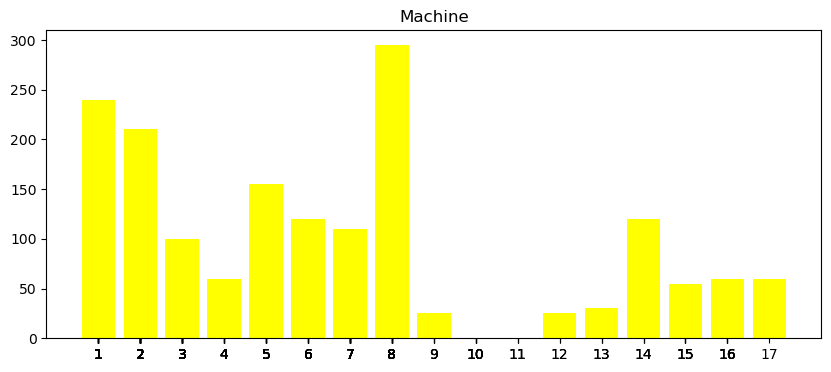

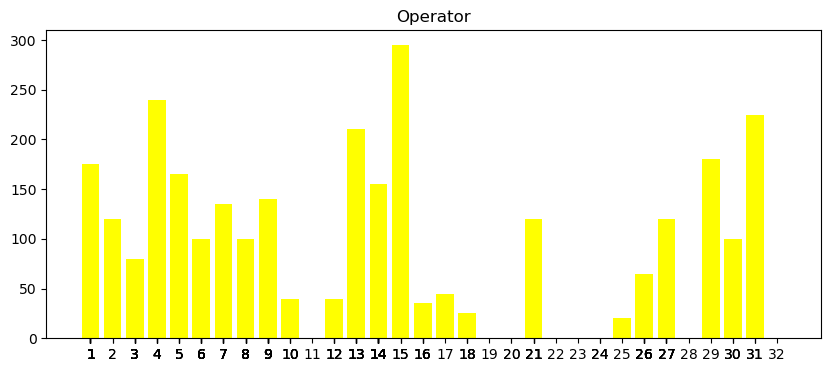

In [25]:
# Correlação entre o tempo de inatividade por falha no cabo e os equipamentos e operadores envolvidos.

for coluna in ['Machine', 'Operator']:
    fig, ax = plt.subplots(figsize=(10, 4))
    grafico = plt.bar(x=df[coluna], height=df['Cable Failure Downtime'], color='yellow')
    plt.xticks(df[coluna])
    plt.title(coluna)
    plt.show(grafico)

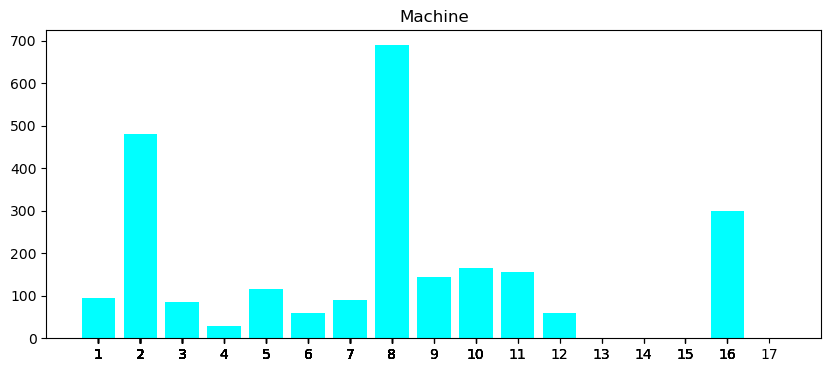

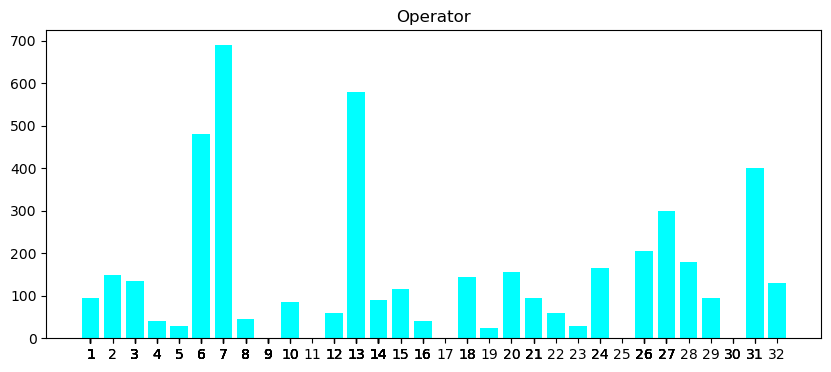

In [26]:
# Análise do tempo de inatividade causado por outras falhas, associando-o às máquinas e aos operadores.

for coluna in ['Machine', 'Operator']:
    fig, ax = plt.subplots(figsize=(10, 4))
    grafico = plt.bar(x=df[coluna], height=df['Other Failure Downtime'], color='aqua')
    plt.xticks(df[coluna])
    plt.title(coluna)
    plt.show(grafico)

In [27]:
# Identificação de todos os operadores da máquina 8, a qual registrou o maior tempo de inatividade.

df[df['Machine'] == 8]

,Machine,Shift,Operator,Cable Failures,Cable Failure Downtime,Other Failures,Other Failure Downtime
26,8,B,15,4,160,0,0
71,8,B,13,3,175,0,0
92,8,A,15,6,295,0,0
93,8,B,29,4,180,1,95
101,8,A,31,5,225,1,120
102,8,B,13,1,30,2,580
109,8,A,31,0,0,1,400
110,8,B,13,1,75,1,480
120,8,A,7,0,0,1,690
121,8,B,13,0,0,1,80


# Conclusão:
 - A análise dos dados da linha de produção de cabos de cobre indicou que o aumento no número de defeitos está fortemente concentrado na Máquina 8,
independentemente do turno ou do operador.<br><br>
 - Embora o Operador 15 apresente os piores índices, todos os operadores que atuaram nessa máquina registraram
um número elevado de falhas de cabo e tempo de parada. Esse padrão consistente entre diferentes operadores e turnos sugere que o problema tem origem na
própria máquina, e não em práticas específicas de operação.<br><br>
 - Diante disso, é importante fazer uma inspeção técnica urgente na Máquina 8, revisar seu histórico de manutenção e aplicar ações corretivas e preventivas, acompanhando de perto para garantir que ela continue funcionando adequadamente.